In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp,ttest_ind,levene,shapiro,chi2_contingency
%matplotlib inline

In [41]:
df=pd.read_csv('responses.csv')
df.head(5)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [42]:
# Retaining only the required columns

df=df[['Gender','Village - town','Finances','Healthy eating']]

In [43]:
df.head()

,Gender,Village - town,Finances,Healthy eating
0,female,village,3.0,4.0
1,female,city,3.0,3.0
2,female,city,2.0,3.0
3,female,city,2.0,3.0
4,female,village,4.0,4.0


In [44]:
df.index

# There are 1010 index values. We should therefore see 1010 observations in each feature

RangeIndex(start=0, stop=1010, step=1)

In [45]:
# Checking for missing values
df.info()

# There are missing values in all the columns. Further exploration is required to fix these null values accordingly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 4 columns):
Gender            1004 non-null object
Village - town    1006 non-null object
Finances          1007 non-null float64
Healthy eating    1007 non-null float64
dtypes: float64(2), object(2)
memory usage: 31.6+ KB


In [46]:
# Exploring the null values in the 'Gender' column

df[df['Gender'].isnull()]

# There are 6 rows which have null values for 'Gender'. These entries are replaced these with the most frequently occuring value.

,Gender,Village - town,Finances,Healthy eating
137,NaN,village,4.0,1.0
201,NaN,village,2.0,3.0
226,NaN,village,3.0,3.0
542,NaN,city,2.0,4.0
621,NaN,city,3.0,4.0
934,NaN,city,2.0,2.0


In [47]:
#Fixing null values in the 'Gender column with the most frequent value 

df['Gender']=df['Gender'].fillna(df['Gender'].value_counts().index[0])

In [48]:
# Exploring the null values in the 'Village - town' column

df[df['Village - town'].isnull()]

,Gender,Village - town,Finances,Healthy eating
45,male,NaN,4.0,5.0
368,female,NaN,4.0,4.0
996,male,NaN,3.0,4.0
997,female,NaN,3.0,3.0


In [49]:
# Fixing the null values in the 'Village - town' column

# Similar to the 'Gender' column, we have 4 rows which have null values for 'Village-town' that could be replaced with the most frequently occuring value

df['Village - town']=df['Village - town'].fillna(df['Village - town'].value_counts().index[0])

In [84]:
# Fixing the null values in the 'Finances' and 'Healthy eating' columns

df.info()

# The 3 null values each in 'Finances' and 'Healthy eating' columns could be replaced with the mean, median, or mode

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 4 columns):
Gender            1010 non-null object
Village - town    1010 non-null object
Finances          1010 non-null float64
Healthy eating    1010 non-null float64
dtypes: float64(2), object(2)
memory usage: 31.6+ KB


In [51]:
df.describe().transpose()
# There isn't a big difference between the mean and median. Hence, we can choose to replace null values with average (rounded to the nearest whole number), median, or mode
# Also, the dataset does not appear to have any outliers

,count,mean,std,min,25%,50%,75%,max
Finances,1007.0,3.023833,1.144365,1.0,2.0,3.0,4.0,5.0
Healthy eating,1007.0,3.031778,0.936865,1.0,3.0,3.0,4.0,5.0


In [58]:
# Replacing null values in 'Finances' and 'Healthy eating' with the respective modes
df['Finances']=df['Finances'].fillna(df['Finances'].mode()[0])
df['Healthy eating']=df['Healthy eating'].fillna(df['Healthy eating'].mode()[0])

In [59]:
df.info()
# We do not have any null values any more

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 4 columns):
Gender            1010 non-null object
Village - town    1010 non-null object
Finances          1010 non-null float64
Healthy eating    1010 non-null float64
dtypes: float64(2), object(2)
memory usage: 31.6+ KB


In [60]:
# Checking if any of the columns have unexpected values 

cols=df.columns.tolist()
for col in cols:
    print (df[col].unique())

# We do not have any unexpected values in any of the columns. 
# We cannot identify outliers based on 'Gender' and 'Village-town' as they do not have any unexpected values
# Also, given that 'Healthy eating' and 'Finances' are rating questions, we might not be able to mark outliers based on just these two columns 
# unless we have substantial evidence to do so. (For example: we could've removed outliers if respondents had given the same ratings across many rating questions)

['female' 'male']
['village' 'city']
[3. 2. 4. 5. 1.]
[4. 3. 2. 1. 5.]


In [61]:
# Finally, we have the following distribution of respondents

pd.crosstab(df['Gender'],df['Village - town'],margins=True)

Village - town,city,village,All
Gender,,,
female,422,177,599
male,289,122,411
All,711,299,1010


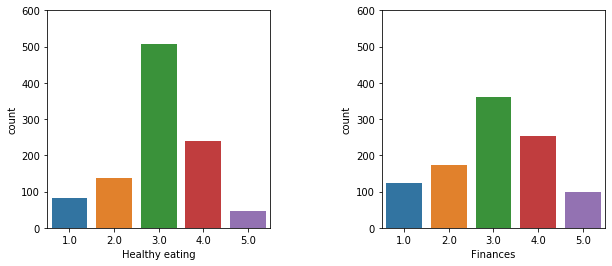

In [62]:
# In the next couple of cells, we perform some basic EDA
# We start with checking the distribution of ratings for 'Finances' and 'Healthy eating' 

f,ax=plt.subplots(1,2,figsize=(10,4))
f.subplots_adjust(wspace=0.5)

sns.countplot(x=df['Healthy eating'],ax=ax[0])
sns.countplot(df['Finances'],ax=ax[1])
ax[0].set_yticks(np.arange(0,700,100))
ax[1].set_yticks(np.arange(0,700,100))

# It is observed that close to half of the respondents (~500/1010) have rated 3 for 'Healthy eating'.
# For 'Finances', the rating distribution is slighty more spread out compared to 'Healthy eating'

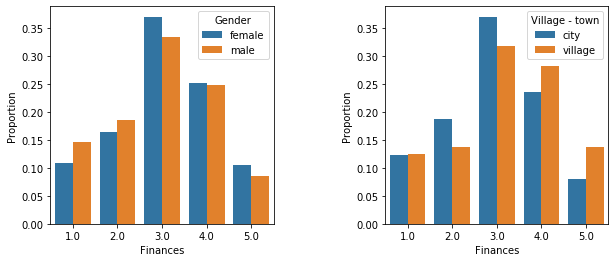

In [18]:
# We can first deep-dive into 'Finances' and look at whether 'Gender' or 'Village-town' influence ratings
# For this, we check the aggregate plots: For example: The plots below show the proportion of males who have rated 1,2,3,4,or 5 for 'Finances' compared to the proportion of females

f,ax=plt.subplots(1,2,figsize=(10,4))
f.subplots_adjust(wspace=0.5)

prop_df_Finances_Gender = (df['Finances']
           .groupby(df['Gender'])
           .value_counts(normalize=True)
           .rename("Proportion")
           .reset_index())

prop_df_Finances_VilageTown = (df['Finances']
           .groupby(df['Village - town'])
           .value_counts(normalize=True)
           .rename("Proportion")
           .reset_index())

sns.barplot(x='Finances', y='Proportion', hue='Gender', data=prop_df_Finances_Gender,ax=ax[0])
sns.barplot(x='Finances', y='Proportion', hue='Village - town', data=prop_df_Finances_VilageTown,ax=ax[1])

# It is observed that there isn't a stark difference in the way females and males rate Finances indicating that Gender might not influence Finance ratings
# However, we see a difference in the way residents of Village rate Finances compared to residents of City.
# Residents of Village indicate that they are more likely to save all the money they can (ratings 4 and 5) compared to residents of Cities

In [63]:
# Question 2a: Is saving money (finances) gender dependant?

# We can run the chi-square test to test for independence of two categorical variables

# H0: There is no relationship between 'Gender' and rating of 'Finances'
# Ha: There is a relationship between 'Gender' and rating of 'Finances'

cont=pd.crosstab(df['Gender'],df['Finances'])
chi2_contingency(cont)

# Since the p-value (0.25) is >5% we accept the null hypothesis
# Conclusion: Saving money (finances) is NOT gender dependant

(5.328890527727397,
 0.25518454225298753,
 4,
 array([[ 74.13366337, 103.19405941, 214.0980198 , 149.45346535,
          58.12079208],
        [ 50.86633663,  70.80594059, 146.9019802 , 102.54653465,
          39.87920792]]))

## Conclusion: Saving money (finances) is NOT gender dependant

In [64]:
# Question 2b: Is there any differences in money saving (finances) between people from city or village?

Mean_Finances_Village=df[df['Village - town']=='village']['Finances'].mean()
Mean_Finances_City=df[df['Village - town']=='city']['Finances'].mean()
print("Mean Finance rating among village residents:",Mean_Finances_Village)
print("Mean Finance rating among city residents:",Mean_Finances_City)

# It's observed that Village residents rate themselves slightly higher than City residents in terms of finances.
# We could use the t-test to see if the difference is significant

Mean Finance rating among village residents: 3.17056856187291
Mean Finance rating among city residents: 2.962025316455696


In [65]:
# Creating the required data subsets

Finances_Village=df[df['Village - town']=='village']['Finances']
Finances_City=df[df['Village - town']=='city']['Finances']

In [66]:
# Shapiro test to verify normality of data

# H0: Data is normally distributed
# Ha: Data is not normally distributed

w_stat_village,p_value_village=shapiro(Finances_Village)
w_stat_city,p_value_city=shapiro(Finances_City)
print("p-value for village: {},\np-value for city: {}".format(p_value_village,p_value_city))

# Since p-value > 5% for both the distributions, we accept the null hypothesis: Data is normally distributed

p-value for village: 1.0102719442267594e-12,
p-value for city: 7.057024187571386e-20


In [67]:
# Levene's test to verify equal variance among the two groups 

# H0: Variances of the two groups are equal
# Ha: Variances of the two groups are not equal

levene(Finances_Village,Finances_City)

# p-value is <5% and hence we reject the null hypothesis: Variances are unequal. We can go ahead with the t-test, but with unequal variances

LeveneResult(statistic=4.445255344457927, pvalue=0.035244641971051004)

In [68]:
# We now run the t-test WITH UNEQUAL VARIANCES to check if the means of 'Finances' is significantly different based on place of residence - 'Village-town'

#H0: The mean rating for 'Finances' is the same for residents of village and city
#Ha: The mean rating for 'Finances' is not the same for residents of village and city

ttest_ind(Finances_Village,Finances_City,equal_var=False)

# p-value is <5% and hence we reject the null hypothesis: Mean ratings for 'Finances' is the not the same for residents of village and city
# Conclusion: There is a difference in money saving (finances) between people from city and village
# Residents of villages are significantly more likely to save money compared to residents of cities

Ttest_indResult(statistic=2.5767607213707127, pvalue=0.01024535677156769)

## Conclusion: There is a difference in money saving (finances) between people from city and village
## Residents of villages are significantly more likely to save money compared to residents of cities

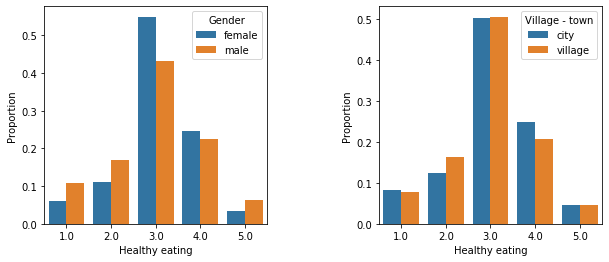

In [69]:
# We can now deep-dive into 'Healthy eating' and check if ratings are 'Gender' dependant and/or 'Village - town' dependant

# For this, we check the aggregate plots: For example: The plots below show the proportion of males and females who have rated 1,2,3,4,or 5 for 'Healthy eating'

f,ax=plt.subplots(1,2,figsize=(10,4))
f.subplots_adjust(wspace=0.5)

prop_df_HealthyEating_Gender = (df['Healthy eating']
           .groupby(df['Gender'])
           .value_counts(normalize=True)
           .rename("Proportion")
           .reset_index())

prop_df_HealthyEating_VilageTown = (df['Healthy eating']
           .groupby(df['Village - town'])
           .value_counts(normalize=True)
           .rename("Proportion")
           .reset_index())

sns.barplot(x='Healthy eating', y='Proportion', hue='Gender', data=prop_df_HealthyEating_Gender,ax=ax[0])
sns.barplot(x='Healthy eating', y='Proportion', hue='Village - town', data=prop_df_HealthyEating_VilageTown,ax=ax[1])

# It is observed that the rating behavior for 'Healthy eating' is slightly different between males and females
# We can formulate a hypothesis and test to verify if the rating behavior for 'Healthy eating' differs based on 'Gender'

# The rating behavior is fairly consistent among city residents and village residents indicating that place of residence
# might not influence respondents' perception of 'Healthy eating'

In [71]:
# Question 2c: Do Women have a Healthier Lifestyle than Men?

Mean_Healthyeating_Males=df[df['Gender']=='male']['Healthy eating'].mean()
Mean_Healthyeating_Females=df[df['Gender']=='female']['Healthy eating'].mean()
print("Mean Healthy Eating rating among males:",Mean_Healthyeating_Males)
print("Mean Healthy Eating rating among females:",Mean_Healthyeating_Females)

# It's observed that females rate themselves slightly higher than males in terms of Healthy eating.
# We could use the one tailed t-test to see if women have a significantly healthier lifestyle

Mean Healthy Eating rating among males: 2.9610705596107056
Mean Healthy Eating rating among females: 3.0801335559265444


In [72]:
# Creating the required data subsets
Healthyeating_female=df[df['Gender']=='female']['Healthy eating']
Healthyeating_male=df[df['Gender']=='male']['Healthy eating']

In [73]:
# Shapiro test to verify normality of data

w_stat_females_HE,p_value_females_HE=shapiro(Healthyeating_female)
w_stat_males_HE,p_value_males_HE=shapiro(Healthyeating_male)
print("p-value for females: {},\np-value for males: {}".format(p_value_females_HE,p_value_males_HE))

# Since p-value > 5% for both the distributions, we accept the null hypothesis: Data is normally distributed

p-value for females: 1.755579021221877e-23,
p-value for males: 1.2739190238247465e-15


In [74]:
# Levene's test to verify equal variance among the two groups 

levene(Healthyeating_female,Healthyeating_male)

# p-value is >5% and hence we accept the null hypothesis: Variances are equal. We can go ahead with the t-test

LeveneResult(statistic=19.478050381300196, pvalue=1.1272330320679055e-05)

In [76]:
# We now run the t-test to check if the means of 'Healthy Eating' among females is significantly higher than that of males

#H0: The mean rating for 'Healthy Eating' among females is less than or equal to that of males
#Ha: The mean rating for 'Healthy Eating' among women is greater than that of males
ttest_ind(Healthyeating_female,Healthyeating_male)

# The p-value shown is for a two-tailed test. For a one tailed test, the p-value is ~0.046/2=0.023, which is < 5%
# Therefore, we reject the null hypothesis
# Conclusion: Women have a healthier lifestyle than men

Ttest_indResult(statistic=1.990009744180731, pvalue=0.04685965412880698)

## Conclusion: Women have a healthier lifestyle than men

In [77]:
# Question 2d: Are Village People Healthier than City People?

Mean_Healthyeating_Village=df[df['Village - town']=='village']['Healthy eating'].mean()
Mean_Healthyeating_City=df[df['Village - town']=='city']['Healthy eating'].mean()
print("Mean Healthy Eating rating among residents of villages:",Mean_Healthyeating_Village)
print("Mean Healthy Eating rating among residents of cities:",Mean_Healthyeating_City)

# It's observed that residents of cities rate themselves slightly higher than residents of villages in terms of Healthy eating.

Mean Healthy Eating rating among residents of villages: 2.983277591973244
Mean Healthy Eating rating among residents of cities: 3.052039381153305


In [78]:
# Creating the required data subsets
Healthyeating_village=df[df['Village - town']=='village']['Healthy eating']
Healthyeating_city=df[df['Village - town']=='city']['Healthy eating']

In [79]:
# Shapiro test to verify normality of data

w_stat_village_HE,p_value_village_HE=shapiro(Healthyeating_village)
w_stat_city_HE,p_value_city_HE=shapiro(Healthyeating_city)
print("p-value for residents of village: {},\np-value for residents of cities: {}".format(p_value_village_HE,p_value_city_HE))

# Since p-value > 5% for both the distributions, we accept the null hypothesis: Data is normally distributed

p-value for residents of village: 2.0663363666070973e-14,
p-value for residents of cities: 1.2268010599450731e-23


In [80]:
# Levene's test to verify equal variance among the two groups 

levene(Healthyeating_village,Healthyeating_city)

# p-value is >5% and hence we accept the null hypothesis: Variances are equal. We can go ahead with the t-test

LeveneResult(statistic=0.02208957185660561, pvalue=0.8818787908095025)

In [81]:
# We now run the t-test to check if the means of 'Healthy Eating' among residents of village is significantly higher than that of residents of cities

#H0: The mean rating for 'Healthy Eating' among residents of villages is less than or equal to that of residents of cities
#Ha: The mean rating for 'Healthy Eating' among residents of villages is greater than that of residents of cities

ttest_ind(Healthyeating_village,Healthyeating_city)

# The t-statistic tells us that city residents are slightly more healthier than village residents, although not significantly
# The p-value shown is for a two-tailed test. For a one tailed test, the p-value is ~0.28/2=0.14, which is > 5%
# Therefore, we accept the null hypothesis
# Conclusion: Village people are not healthier than city people

Ttest_indResult(statistic=-1.066485812628908, pvalue=0.2864594559841501)

## Conclusion: Village people are not healthier than city people